In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import numpy as np

In [2]:
data = load_iris()

In [3]:
X,Y = data['data'],data['target']

In [4]:
X.shape,Y.shape

((150, 4), (150,))

In [5]:
Y = Y.reshape((Y.shape[0],1))

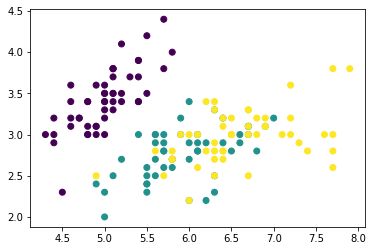

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [7]:
####Deleting the third category from dataset
indices = np.where(Y==2)
for index in sorted(indices[0],reverse=True):
    X = np.delete(X,index,axis=0)
    Y = np.delete(Y,index,axis=0)

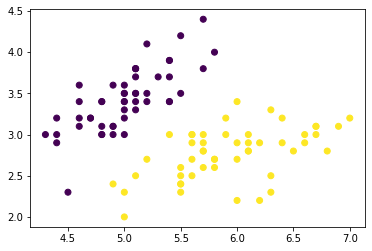

In [8]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [18]:
##Splitting the data into test and train
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,train_size=0.7,random_state=42)

In [19]:
X_test.shape

(30, 4)

In [20]:
#####Calculating the parameters of the GDA
phi = np.mean(Y_train==1)

In [21]:
phi

0.5285714285714286

In [22]:
#####Calculating the mu0 and mu1
indices_0 = np.where(Y_train==0)[0]
mu0 = np.sum(X_train[indices_0],axis=0)/len(indices)

In [23]:
indices_1 = np.where(Y_train==1)[0]
mu1 = np.sum(X_train[indices_1],axis=0)/len(indices)

In [24]:
print("Mu0:",mu0)
print("mu1",mu1)

Mu0: [82.   55.85 24.1   4.  ]
mu1 [109.95  51.5   77.4   24.25]


In [25]:
np.sum(X_train[indices],axis=0)

IndexError: index 100 is out of bounds for axis 0 with size 70

In [26]:
####Calculating the Sigma
X_train[indices_0]-mu0

array([[-77.2 , -52.45, -22.5 ,  -3.8 ],
       [-77.4 , -52.65, -22.7 ,  -3.8 ],
       [-76.8 , -52.45, -22.7 ,  -3.8 ],
       [-76.6 , -51.95, -22.4 ,  -3.6 ],
       [-77.  , -52.65, -22.9 ,  -3.8 ],
       [-76.6 , -51.95, -22.8 ,  -3.6 ],
       [-77.  , -52.55, -22.7 ,  -3.8 ],
       [-77.1 , -52.75, -22.6 ,  -3.8 ],
       [-77.  , -52.45, -22.6 ,  -3.8 ],
       [-76.8 , -52.35, -22.6 ,  -3.8 ],
       [-76.9 , -52.05, -22.6 ,  -3.7 ],
       [-77.  , -52.85, -22.5 ,  -3.8 ],
       [-77.7 , -52.85, -23.  ,  -3.9 ],
       [-77.2 , -52.45, -22.2 ,  -3.8 ],
       [-77.4 , -52.75, -22.6 ,  -3.8 ],
       [-76.9 , -52.35, -22.7 ,  -3.7 ],
       [-77.6 , -52.85, -22.8 ,  -3.8 ],
       [-77.6 , -52.95, -22.7 ,  -3.8 ],
       [-77.4 , -52.45, -22.7 ,  -3.7 ],
       [-76.5 , -52.35, -22.8 ,  -3.8 ],
       [-77.  , -52.35, -22.5 ,  -3.4 ],
       [-76.9 , -52.05, -22.5 ,  -3.8 ],
       [-77.5 , -53.55, -22.8 ,  -3.7 ],
       [-76.7 , -52.15, -22.6 ,  -3.8 ],
       [-76.8 , 

In [27]:
X_s = X_train

In [28]:
for index in indices_0:
    X_s[index] = X_s[index]-mu0

In [29]:
for index in indices_1:
    X_s[index] = X_s[index]-mu1

In [30]:
m = X_s.shape[0]

In [31]:
sigma = np.dot(X_s.T,X_s)/m

In [32]:
sigma

array([[8515.27875   , 4583.50392857, 4847.30228571, 1397.56882143],
       [4583.50392857, 2552.21246429, 2445.32721429,  683.64835714],
       [4847.30228571, 2445.32721429, 3075.21671429,  927.88885714],
       [1397.56882143,  683.64835714,  927.88885714,  284.81789286]])

In [33]:
####Predictions
print('phi',phi)
print('mu0',mu0)
print('mu1',mu1)
print('sigma',sigma)

pi = 3.1415926535
n = len(mu0)
denominator = np.power((2*pi),n/2)*np.sqrt(np.linalg.det(sigma))
predictions = []

for x in X_test:
    ####Predicting for 0 class
    X_minus_muo = x-mu0
    print(X_minus_muo.shape)
    print(sigma.shape)
    P_x0 = np.exp(-0.5*(np.dot(np.dot(X_minus_muo.T,np.linalg.inv(sigma)),X_minus_muo)))/denominator
    print(P_x0.shape)
    P_x0 = np.squeeze(P_x0)
    
    
    ##Predicting for 1 class
    X_minus_mu1 = x-mu1
    P_x1 = np.exp(-0.5*(np.dot(np.dot(X_minus_mu1.T,np.linalg.inv(sigma)),X_minus_mu1)))/denominator
    P_x1 = np.squeeze(P_x1)
    
    if(P_x1>P_x0):
        predictions.append(1)
    else:
        predictions.append(0)

phi 0.5285714285714286
mu0 [82.   55.85 24.1   4.  ]
mu1 [109.95  51.5   77.4   24.25]
sigma [[8515.27875    4583.50392857 4847.30228571 1397.56882143]
 [4583.50392857 2552.21246429 2445.32721429  683.64835714]
 [4847.30228571 2445.32721429 3075.21671429  927.88885714]
 [1397.56882143  683.64835714  927.88885714  284.81789286]]
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()
(4,)
(4, 4)
()


In [97]:
print(predictions)

[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1]


In [98]:
print(accuracy_score(Y_test,predictions))

1.0


In [100]:
Y_test.T

array([[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 1]])

In [101]:
####GDA Classified 100 percent accurately

In [103]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Implementing Logistic regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [106]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [107]:
predict=lr.predict(X_test)

In [108]:
print(accuracy_score(Y_test,predict))

0.5666666666666667


In [109]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72        17
           1       0.00      0.00      0.00        13

    accuracy                           0.57        30
   macro avg       0.28      0.50      0.36        30
weighted avg       0.32      0.57      0.41        30



D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
predict_train = lr.predict(X_train)

In [111]:
print(accuracy_score(Y_train,predict_train))

0.7285714285714285


In [ ]:
###For continuous values with Normal distribution, GDA outperformed Logistic Regression